<a href="https://colab.research.google.com/github/Matheus-Chaves/fatec-inteligencia-artificial/blob/main/Atividade_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from zipfile import ZipFile
import urllib

DOWNLOAD_ROOT = "https://github.com/Matheus-Chaves/fatec-inteligencia-artificial/blob/main/"
WORLD_CUP_PATH = os.path.join("datasets", "world_cup")
WORLD_CUP_URL = DOWNLOAD_ROOT + "archive.zip?raw=true"

def fetch_world_cup_data(world_cup_url=WORLD_CUP_URL, world_cup_path=WORLD_CUP_PATH):
  os.makedirs(world_cup_path, exist_ok=True)
  zip_path = os.path.join(world_cup_path, "archive.zip")
  urllib.request.urlretrieve(world_cup_url, zip_path)
  with ZipFile(zip_path, 'r') as world_cup_zip:
    world_cup_zip.extractall(world_cup_path)
 

In [ ]:
fetch_world_cup_data()

In [4]:
import pandas as pd

def load_world_cup_data(world_cup_path=WORLD_CUP_PATH):
  data = dict()
  for file in os.listdir(world_cup_path):
      if file.endswith(".csv"):
         data[file.replace(".csv","")] = pd.read_csv(os.path.join(world_cup_path, file))
  return data


In [7]:
world_cup = load_world_cup_data()
print(world_cup.keys())

dict_keys(['matches_2022', 'fifa_ranking_2022-10-06', 'matches_1930_2018', 'world_cup'])


In [13]:
world_cup['matches_2022'].head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Attendance,Venue,Officials,Date,Score,Referee,Notes,Round,Host,Year
0,Qatar,Ecuador,0.0,0.3,NaN,2.0,1.2,NaN,Félix Sánchez,Hassan Al-Haydos,...,67372,"Al Bayt Stadium, Al Khor",Daniele Orsato (Referee) · Ciro Carbone (AR1) ...,2022-11-20,0–2,Daniele Orsato,NaN,Group stage,Qatar,2022
1,England,IR Iran,6.0,2.1,NaN,2.0,1.4,NaN,Gareth Southgate,Harry Kane,...,45334,"Khalifa International Stadium, Doha",Raphael Claus (Referee) · Rodrigo Figueiredo H...,2022-11-21,6–2,Raphael Claus,NaN,Group stage,Qatar,2022
2,United States,Wales,1.0,0.8,NaN,1.0,1.5,NaN,Gregg Berhalter,Tyler Adams,...,43418,"Ahmed bin Ali Stadium, Umm al-Afā'ī",Abdulrahman Ibrahim Al Jassim (Referee) · Tale...,2022-11-21,1–1,Abdulrahman Ibrahim Al Jassim,NaN,Group stage,Qatar,2022
3,Senegal,Netherlands,0.0,0.9,NaN,2.0,0.7,NaN,Aliou Cissé,Kalidou Koulibaly,...,41721,"Al Thumama Stadium, ath-Thumāma",Wilton Sampaio (Referee) · Bruno Boschilia (AR...,2022-11-21,0–2,Wilton Sampaio,NaN,Group stage,Qatar,2022
4,France,Australia,4.0,4.0,NaN,1.0,0.5,NaN,Didier Deschamps,Hugo Lloris,...,40875,"Al Janoub Stadium, Al Wakrah",Victor Gomes (Referee) · Zakhele Siwela (AR1) ...,2022-11-22,4–1,Victor Gomes,NaN,Group stage,Qatar,2022


In [9]:
world_cup['matches_2022'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     54 non-null     object 
 1   away_team     54 non-null     object 
 2   home_score    44 non-null     float64
 3   home_xg       44 non-null     float64
 4   home_penalty  0 non-null      float64
 5   away_score    44 non-null     float64
 6   away_xg       44 non-null     float64
 7   away_penalty  0 non-null      float64
 8   home_manager  44 non-null     object 
 9   home_captain  44 non-null     object 
 10  away_manager  44 non-null     object 
 11  away_captain  44 non-null     object 
 12  home_goals    30 non-null     object 
 13  away_goals    27 non-null     object 
 14  Attendance    54 non-null     int64  
 15  Venue         44 non-null     object 
 16  Officials     44 non-null     object 
 17  Date          54 non-null     object 
 18  Score         44 non-null     ob

In [10]:
world_cup['matches_2022'].describe()

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Notes,Year
count,44.000000,44.000000,0.0,44.000000,44.000000,0.0,54.000000,0.0,54.0
mean,1.340909,1.279545,NaN,1.136364,1.211364,NaN,41521.388889,NaN,2022.0
std,1.569227,0.894838,NaN,1.112109,1.057029,NaN,24502.775320,NaN,0.0
min,0.000000,0.100000,NaN,0.000000,0.000000,NaN,0.000000,NaN,2022.0
25%,0.000000,0.675000,NaN,0.000000,0.575000,NaN,40117.750000,NaN,2022.0
50%,1.000000,1.000000,NaN,1.000000,0.900000,NaN,42892.500000,NaN,2022.0
75%,2.000000,1.650000,NaN,2.000000,1.525000,NaN,44767.000000,NaN,2022.0
max,7.000000,4.000000,NaN,4.000000,5.700000,NaN,88966.000000,NaN,2022.0


In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(world_cup['matches_2022'], test_size=0.2, random_state=42)

In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 8 to 38
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     43 non-null     object 
 1   away_team     43 non-null     object 
 2   home_score    37 non-null     float64
 3   home_xg       37 non-null     float64
 4   home_penalty  0 non-null      float64
 5   away_score    37 non-null     float64
 6   away_xg       37 non-null     float64
 7   away_penalty  0 non-null      float64
 8   home_manager  37 non-null     object 
 9   home_captain  37 non-null     object 
 10  away_manager  37 non-null     object 
 11  away_captain  37 non-null     object 
 12  home_goals    26 non-null     object 
 13  away_goals    23 non-null     object 
 14  Attendance    43 non-null     int64  
 15  Venue         37 non-null     object 
 16  Officials     37 non-null     object 
 17  Date          43 non-null     object 
 18  Score         37 non-null     ob

In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 19 to 13
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     11 non-null     object 
 1   away_team     11 non-null     object 
 2   home_score    7 non-null      float64
 3   home_xg       7 non-null      float64
 4   home_penalty  0 non-null      float64
 5   away_score    7 non-null      float64
 6   away_xg       7 non-null      float64
 7   away_penalty  0 non-null      float64
 8   home_manager  7 non-null      object 
 9   home_captain  7 non-null      object 
 10  away_manager  7 non-null      object 
 11  away_captain  7 non-null      object 
 12  home_goals    4 non-null      object 
 13  away_goals    4 non-null      object 
 14  Attendance    11 non-null     int64  
 15  Venue         7 non-null      object 
 16  Officials     7 non-null      object 
 17  Date          11 non-null     object 
 18  Score         7 non-null      o

In [33]:
import numpy as np

world_cup["matches_2022"]["score_cat"] = pd.cut(world_cup["matches_2022"]["home_score"],
 bins=[0., 2, 4, 5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])


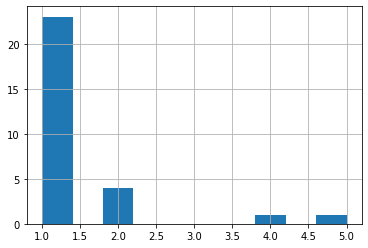

In [34]:
world_cup["matches_2022"]["score_cat"].hist()

In [35]:
world_cup["matches_2022"]["score_cat"].head()

0    NaN
1      4
2      1
3    NaN
4      2
Name: score_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(world_cup['matches_2022'], world_cup["matches_2022"]["score_cat"].notnull()):
  strat_train_set = world_cup['matches_2022'].loc[train_index]
  strat_test_set = world_cup['matches_2022'].loc[test_index]


In [38]:
strat_test_set["score_cat"].value_counts() / len(strat_test_set)

1    0.454545
2    0.090909
3    0.000000
4    0.000000
5    0.000000
Name: score_cat, dtype: float64

In [39]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("score_cat", axis=1, inplace=True)